## CNN BASELINE MODEL

In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import json

import numpy as np
import pandas as pd
import keras
from keras.callbacks import Callback
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### 1.Loading 224x224 dataset

In [3]:
X_train = np.load('/home/zxt/data/224/2k/X_train_224.npy')
X_validate = np.load('/home/zxt/data/224/2k/X_validate_224.npy')
X_test = np.load('/home/zxt/data/224/2k/X_test_224.npy')
Y_train = np.load('/home/zxt/data/224/2k/Y_train_224.npy')
Y_validate = np.load('/home/zxt/data/224/2k/Y_validate_224.npy')
Y_test = np.load('/home/zxt/data/224/2k/Y_test_224.npy')

In [7]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (28000, 224, 224, 3)
28000 train samples
8400 validate samples
3600 test samples


In [11]:
# Convert the images to float and scale it to a range of 0 to 1
# x_train = X_train.astype('float32')
# x_validate = X_validate.astype('float32')
# x_test = X_test.astype('float32')

X_train /=255.
X_validate /=  255.
X_test /= 255.

In [13]:
# X_train[1]

In [21]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19

In [22]:
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19

In [23]:
for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='bobcat':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19

In [27]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(Y_train,20)
y_valid=np_utils.to_categorical(Y_validate,20)
y_test=np_utils.to_categorical(Y_test,20)


### 2. Create Callback for F1 score

In [28]:
class Metrics(Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=num_classes
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" - val_precision: {_val_precision:.4f}"
               f" - val_recall: {_val_recall:.4f}"))

        return

### 3. Creating and Training the Model¶

In [17]:
batch_size = 64
num_classes = 20
epochs = 30
save_dir = os.path.join(os.getcwd(), 'models')
model_name = 'keras_cnn_2k_model.h5'

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [29]:
f1_metrics = Metrics()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[f1_metrics],
    validation_data=(X_validate, y_valid)
)

Train on 28000 samples, validate on 8400 samples
Epoch 1/30
28000/28000 [==============================] - 307s 11ms/step - loss: 1.9697 - accuracy: 0.3591 - val_loss: 1.4125 - val_accuracy: 0.4986
val_f1: 0.4840 - val_precision: 0.5179 - val_recall: 0.4972
Epoch 2/30
28000/28000 [==============================] - 284s 10ms/step - loss: 1.3797 - accuracy: 0.5109 - val_loss: 1.1846 - val_accuracy: 0.5868
val_f1: 0.5745 - val_precision: 0.6152 - val_recall: 0.5852
Epoch 3/30
28000/28000 [==============================] - 285s 10ms/step - loss: 1.1395 - accuracy: 0.5986 - val_loss: 1.0529 - val_accuracy: 0.6248
val_f1: 0.6102 - val_precision: 0.6441 - val_recall: 0.6240
Epoch 4/30
28000/28000 [==============================] - 285s 10ms/step - loss: 0.9204 - accuracy: 0.6699 - val_loss: 0.9834 - val_accuracy: 0.6658
val_f1: 0.6595 - val_precision: 0.6769 - val_recall: 0.6646
Epoch 5/30
28000/28000 [==============================] - 284s 10ms/step - loss: 0.7580 - accuracy: 0.7319 - val_lo

### 3.

In [30]:
model.save('/home/zxt/data/model/cnn_baseline_2k_224.h5')

### 4. Evaluation

In [32]:
history_df = pd.DataFrame(hist.history)
history_df['val_f1'] = f1_metrics.val_f1s
history_df['val_precision'] = f1_metrics.val_precisions
history_df['val_recall'] = f1_metrics.val_recalls

# history_df[['loss', 'val_loss']].plot()
# history_df[['acc', 'val_acc']].plot()
# history_df[['val_f1', 'val_precision', 'val_recall']].plot()

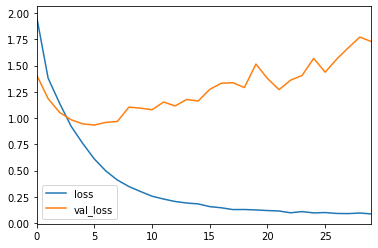

In [33]:
history_df[['loss', 'val_loss']].plot()

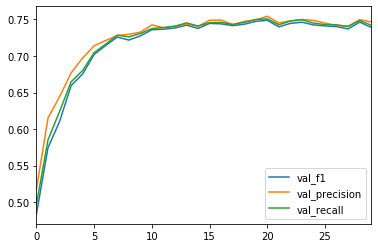

In [35]:
history_df[['val_f1', 'val_precision', 'val_recall']].plot()

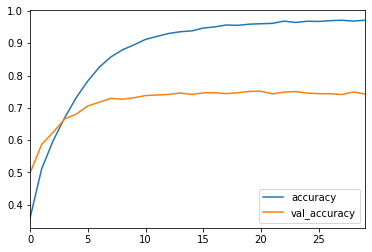

In [36]:
history_df[['accuracy', 'val_accuracy']].plot()

### 5. Prediction

In [37]:
loss,accuracy = model.evaluate(X_test,y_test,)
print('\ntest loss',loss)
print('accuracy',accuracy)

3600/3600 [==============================] - 13s 4ms/step

test loss 1.6570700799094307
accuracy 0.7547222375869751
